# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 4
# Regularization, High Dimensionality, PCA


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A): 109A

# Note: All answers are in green font

Import libraries:

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
%matplotlib inline

# Continuing Bike Sharing Usage Data

In this homework, we will focus on multiple linear regression, regularization, dealing with high dimensionality, and PCA. We will continue to build regression models for the Capital Bikeshare program in Washington D.C.  See Homework 3 for more information about the data.

*Note: please make sure you use all the processed data from HW 3 Part (a)...you make want to save the data set on your computer and reread the csv/json file here.


In [6]:
Biketrain = pd.read_csv('Bikeshare_train.csv')
Biketest = pd.read_csv('Bikeshare_test.csv')
y_train = Biketrain['count'].values
y_test = Biketest['count'].values
X_train = pd.read_pickle('Xtrain')
X_test = pd.read_pickle('Xtest')

## Part (f): Regularization/Penalization Methods

As an alternative to selecting a subset of predictors and fitting a regression model on the subset, one can fit a linear regression model on all predictors, but shrink or regularize the coefficient estimates to make sure that the model does not "overfit" the training set. 

Use the following regularization techniques to fit linear models to the training set:
- Ridge regression
- Lasso regression
    
You may choose the shrikage parameter $\lambda$ from the set $\{10^{-5}, 10^{-4},...,10^{4},10^{5}\}$ using cross-validation. In each case, 

- How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) fropm HW 3? Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.
- List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?
- Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.



We next analyze the performance of the two shrinkage methods for different training sample sizes:
- Generate random samples of sizes 100, 150, ..., 400 from the training set. You may use the following code to draw a random sample of a specified size from the training set:

In [7]:

#--------  sample
# A function to select a random sample of size k from the training set
# Input: 
#      x (n x d array of predictors in training data)
#      y (n x 1 array of response variable vals in training data)
#      k (size of sample) 
# Return: 
#      chosen sample of predictors and responses

def sample(x, y, k):
    n = x.shape[0] # No. of training points
    
    # Choose random indices of size 'k'
    subset_ind = np.random.choice(np.arange(n), k)
    
    # Get predictors and reponses with the indices
    x_subset = x[subset_ind, :]
    y_subset = y[subset_ind]
    
    return (x_subset, y_subset)

- Fit linear, Ridge and Lasso regression models to each of the generated sample. In each case, compute the $R^2$ score for the model on the training sample on which it was fitted, and on the test set.
- Repeat the above experiment for 10 random trials/splits, and compute the average train and test $R^2$ across the trials for each training sample size. Also, compute the standard deviation (SD) in each case.
- Make a plot of the mean training $R^2$ scores for the linear, Ridge and Lasso regression methods as a function of the training sample size. Also, show a confidence interval for the mean scores extending from **mean - SD** to **mean + SD**. Make a similar plot for the test $R^2$ scores.

How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. How do the confidence intervals for the estimated $R^2$ change with training sample size? Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

*Hint:* You may use `sklearn`'s `RidgeCV` and `LassoCV` classes to implement Ridge and Lasso regression. These classes automatically perform cross-validation to tune the parameter $\lambda$ from a given range of values. You may use the `plt.errorbar` function to plot confidence bars for the average $R^2$ scores.

# Part (f) Code and Answers

In [8]:
# Ridge and Lasso
alphas = [10**(i) for i in range(-5,6)]
linreg = LinearRegression(fit_intercept = True)
linreg.fit(X_train.values,y_train)
ridge = RidgeCV(alphas = alphas,fit_intercept = True)
ridge.fit(X_train.values,y_train)
lassr = LassoCV(alphas = alphas,fit_intercept = True)
lassr.fit(X_train.values,y_train)


C:\Users\Shaan Desai\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000],
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [9]:
linreg.coef_

array([  898.82903949,  1032.88157484,  1226.18654265,    88.94009267,
         239.18089841,   333.34908642,   -65.81249999,  -792.2628985 ,
       -1279.98700626,  -776.4754899 ,   405.1445661 ,   486.25090367,
         112.68164522,  -118.83581872,  -284.35627461,  -123.75147639,
        -195.28593262,   170.51134687,    61.25602987,   111.06689939,
         465.14500996,   308.15314174,   -16.56658402, -1581.97828361,
         925.73384986,   312.43407189,  -548.49294906,  -255.12258899])

In [10]:
ridge.coef_

array([ 393.17255806,  172.1792805 ,  761.78543763, -115.1218662 ,
         88.89050681,  369.53564813,  133.37245386, -312.37487384,
       -529.54451686,  -89.29404068,  676.88686869,  503.42304275,
        159.09586506, -100.6582173 , -158.55971554, -130.58113365,
       -125.49534264,  124.31796857,   64.47904074,  126.17310553,
        303.9886922 ,  217.45335409,   20.28051056, -676.14388831,
        682.80825822,  553.88994683, -567.72191933, -266.41311936])

In [11]:
lassr.coef_

array([  543.86140467,   113.75783363,   898.93231611,    -0.        ,
          13.92014333,   312.54570464,     0.        ,  -354.60286434,
        -496.15194078,    -0.        ,   834.58741964,   483.88249353,
          68.02952205,    -0.        ,    -0.        ,  -178.96215235,
        -129.13868319,    17.59275663,     0.        ,    11.32761788,
         309.95116311,   277.51880871,    -0.        , -1058.29476303,
         854.7339104 ,   399.36424117,  -555.84074594,  -254.3687472 ])

Q
- How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) fropm HW 3? Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.

A

- What we can see above is that the ridge coefficients are generally smaller than the normal linear regression from part 3b). We can also see that Lasso makes some of the coefficients smaller. There is a difference between lasso and ridge in that lasso adds a linear term to the cost function while ridge adds a squared term. The difference between these methods means that Lasso is more likely to suppress coefficients down to zero in relation to ridge as we saw in class with an ellipse lying tangent to a square/circle.

Q
- List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?

A

In [12]:
print('Lasso coefficients that are ~ 0: %s' %X_train.columns.values[np.where(abs(lassr.coef_)<10**(-10))])


Lasso coefficients that are ~ 0: ['month_2' 'month_5' 'month_8' 'month_12' 'holiday_1' 'day_of_week_4'
 'weather_2']




- In part c the statistically significant predictors were 'season4','weather3','humidity','windspeed', none of which is listed above in the predictors dropped by lasso which means lasso and t-test dropped the same predictors with t-test dropping more than lasso. Ridge does not drop any columns.

Q
- Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.



A

- The ridge regressor assigns similar coefficients to temp and atemp. While Lasso assigns a larger coefficient to temp than to atemp. The key difference here is that ridge tries to solve the issue of multi collinearity by equally weighting similar predictors

- # Training sample size variation

In [13]:
# your code here
alphas = [10**(i) for i in range(-5,6)]
linreg = LinearRegression(fit_intercept = True)
ridge = RidgeCV(alphas = alphas,fit_intercept = True)
lassr = LassoCV(alphas = alphas,fit_intercept = True)

samples = [100+50*i for i in range(7)]
r2train  = np.zeros((3,len(samples),10))
r2test  = np.zeros((3,len(samples),10))

for i in range(len(samples)):
    for j in range(10):
        x_sub, y_sub = sample(X_train.values,y_train,samples[i])
        linreg.fit(x_sub,y_sub)
        ridge.fit(x_sub,y_sub)
        lassr.fit(x_sub,y_sub)
        r2train[0,i,j] = r2_score(y_sub,linreg.predict(x_sub))
        r2train[1,i,j] = r2_score(y_sub,ridge.predict(x_sub))
        r2train[2,i,j] = r2_score(y_sub,lassr.predict(x_sub))
        r2test[0,i,j] = r2_score(y_test,linreg.predict(X_test.values))
        r2test[1,i,j] = r2_score(y_test,ridge.predict(X_test.values))
        r2test[2,i,j] = r2_score(y_test,lassr.predict(X_test.values))
        

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shaan Desai\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shaan Desai\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Shaan Desai\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. 

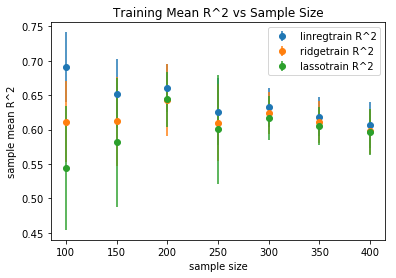

In [14]:
meanr2train = np.mean(r2train,axis = 2)
meanr2test = np.mean(r2test,axis = 2)
stdr2train = np.std(r2train,axis = 2)
stdr2test = np.std(r2test,axis=2)
plt.figure()
lbl = ['linreg','ridge','lasso']
for i in range(3):
    plt.errorbar(samples,meanr2train[i,:],yerr = stdr2train[i,:],fmt = 'o',label = lbl[i]+'train R^2')
    #plt.scatter(samples,meanr2test[i,:],label = lbl[i]+'test R^2')
    plt.legend(loc = 'best')
plt.title('Training Mean R^2 vs Sample Size')
plt.xlabel('sample size')
plt.ylabel('sample mean R^2')

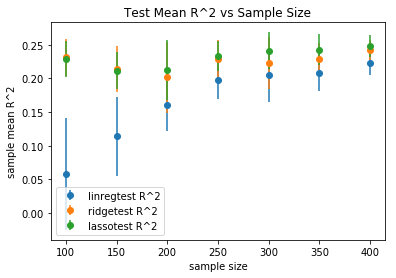

In [15]:
plt.figure()
lbl = ['linreg','ridge','lasso']
for i in range(3):
    plt.errorbar(samples,meanr2test[i,:],yerr = stdr2test[i,:],fmt = 'o',label = lbl[i]+'test R^2')
    plt.legend(loc = 'best')
plt.title('Test Mean R^2 vs Sample Size')
plt.xlabel('sample size')
plt.ylabel('sample mean R^2')

Q

- How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. How do the confidence intervals for the estimated $R^2$ change with training sample size? Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

A

- The training R^2 score for linear regression is better than lasso/ridge because they attempt to prevent overfitting. This means that they perform better in their test r^2 as we can see in the figures above. As sample size grows, the standard deviation of each model reduces since more samples in training should allow for a better understanding of the overall process.When one needs to fit a regression model using a small training sample they should opt for ridge since it performs relatively well on the training set but does well to prevent overfitting with a small sample size on the test set.

## Part (g): Polynomial & Interaction Terms

Moving beyond linear models, we will now try to improve the performance of the regression model in Part (b) from HW 3 by including higher-order polynomial and interaction terms. 

- For each continuous predictor $X_j$, include additional polynomial terms $X^2_j$, $X^3_j$, and $X^4_j$, and fit a multiple regression model to the expanded training set. How does the $R^2$ of this model on the test set compare with that of the linear model fitted in Part (b) from HW 3? Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 

- Fit a multiple linear regression model with additional interaction terms $\mathbb{I}_{month = 12} \times temp$ and $\mathbb{I}_{workingday = 1} \times \mathbb{I}_{weathersit = 1}$ and report the test $R^2$ for the fitted model. How does this compare with the $R^2$ obtained using linear model in Part (b) from HW 3? Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

# Polynomial Terms

In [16]:
# your code here
# Pick out continuous variables, add polynomial terms
X = X_train[['temp','atemp','humidity','windspeed']].values
new_X = np.hstack((X**(i+2) for i in range(3)))
new_X = np.append(X_train.values,new_X,axis = 1)
Xt = X_test[['temp','atemp','humidity','windspeed']].values
new_Xt = np.hstack((Xt**(i+2) for i in range(3)))
new_Xt = np.append(X_test.values,new_Xt,axis = 1)
A1 = np.copy(new_X)
B1 = np.copy(new_Xt)

In [17]:
Xf1 = sm.add_constant(new_X)
os1 = sm.OLS(y_train,Xf1).fit()
print('Train R^2 of pol features = %s' %r2_score(y_train,os1.predict(sm.add_constant(new_X))))
print('Test R^2 of pol features = %s' %r2_score(y_test,os1.predict(sm.add_constant(new_Xt))))
os1.summary()


Train R^2 of pol features = 0.669656240221
Test R^2 of pol features = 0.29395929122


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     15.13
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           7.98e-50
Time:                        17:25:11   Log-Likelihood:                -2790.9
No. Observations:                 331   AIC:                             5662.
Df Residuals:                     291   BIC:                             5814.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5035.2713    460.417     10.936      0.000      4129.101  5941.442
x1           766.4307    454.546      1.686      0.093      -128.185  1661.046
x2          1578.7544    519.364      3.040      0.003       556.569  2600.940
x3          1523.2288    467.580      3.258      0.001       602.961  2443.496
x4          -325.0686    409.611     -0.794      0.428     -1131.245   481.108
x5          -304.8491    446.028     -0.683      0.495     -1182.700   573.002
x6          -418.0245    639.524     -0.654      0.514     -1676.703   840.654
x7         -1037.2042    677.186     -1.532      0.127     -2370.008   295.599
x8         -1456.1857    697.520     -2.088      0.038     -2829.010   -83.362
x9         -1416.9882    749.751     -1.890      0.060     -2892.610    58.634
x10        -1715.9389    743.240     -2.309      0.022     -3178.747  -253.131
x11        -1073.4008    660.859     -1.624      0.105     -2374.069   227.268
x12         -925.8710    617.522     -1.499      0.135     -2141.247   289.505
x13         -825.5328    591.138     -1.397      0.164     -1988.981   337.916
x14         -555.6676    479.543     -1.159      0.248     -1499.481   388.146
x15         -189.7675    365.157     -0.520      0.604      -908.451   528.916
x16          -93.3265    156.015     -0.598      0.550      -400.387   213.734
x17         -133.4279    184.734     -0.722      0.471      -497.012   230.156
x18          147.7313    195.071      0.757      0.449      -236.197   531.660
x19           30.5924    187.547      0.163      0.871      -338.528   399.713
x20          209.9371    182.024      1.153      0.250      -148.313   568.187
x21          471.0834    246.557      1.911      0.057       -14.178   956.345
x22          351.2739    150.615      2.332      0.020        54.841   647.707
x23           59.0119    196.208      0.301      0.764      -327.155   445.179
x24        -1043.9997    546.051     -1.912      0.057     -2118.709    30.710
x25          771.4866    760.117      1.015      0.311      -724.536  2267.510
x26          897.2756    713.172      1.258      0.209      -506.353  2300.904
x27         -668.9145    157.356     -4.251      0.000      -978.615  -359.214
x28         -446.5085    148.929     -2.998      0.003      -739.623  -153.394
x29        -1811.0180    816.910     -2.217      0.027     -3418.820  -203.216
x30         1175.5005    788.864      1.490      0.137      -377.102  2728.103
x31          -53.6709    155.383     -0.345      0.730      -359.488   252.146
x32          -34.1653    126.952     -0.269      0.788      -284.026   215.695
x33            8.6078    275.731      0.031      0.975      -534.071   551.287
x34         -303.9358    246.097     -1.235      0.218      -788.292   180.420
x35          -16.0576     44.892     -0.358      0.721      -104.412    72.297
x3

Q

- How does the $R^2$ of this model on the test set compare with that of the linear model fitted in Part (b) from HW 3? Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 

A

- The R^2 of this model on the test set yields 0.293 (see top) while in 3b it gave us 0.257. This shows us that polynomial features improve the test score. Using a t-test shows us that only temp^2 is statistically significant from the new set. 

# Interaction + Polynomial Terms

In [18]:
# Interaction terms + polynomial terms
temp1 = np.array([pd.get_dummies(Biketrain['month'])[12]])
temp2 = np.array([Biketrain['temp']])
new_X = np.hstack((new_X,temp1.T*temp2.T))
temp1 = np.array([pd.get_dummies(Biketrain['workingday'])[1]])
temp2 = np.array([pd.get_dummies(Biketrain['weather'])[1]])
new_X = np.hstack((new_X,temp1.T*temp2.T))

temp1 = np.array([pd.get_dummies(Biketest['month'])[12]])
temp2 = np.array([Biketest['temp']])
new_Xt = np.hstack((new_Xt,temp1.T*temp2.T))
temp1 = np.array([pd.get_dummies(Biketest['workingday'])[1]])
temp2 = np.array([pd.get_dummies(Biketest['weather'])[1]])
new_Xt = np.hstack((new_Xt,temp1.T*temp2.T))

X = sm.add_constant(new_X)
ols = sm.OLS(y_train,X).fit()
print('Train R^2 of p + interaction = %s' %r2_score(y_train,ols.predict(sm.add_constant(new_X))))
print('Test R^2 of p + interaction = %s' %r2_score(y_test,ols.predict(sm.add_constant(new_Xt))))
ols.summary()



Train R^2 of p + interaction = 0.669967599304
Test R^2 of p + interaction = 0.298749520353


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     14.31
Date:                Wed, 11 Oct 2017   Prob (F-statistic):           1.07e-48
Time:                        17:25:18   Log-Likelihood:                -2790.7
No. Observations:                 331   AIC:                             5665.
Df Residuals:                     289   BIC:                             5825.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5002.8722    480.670     10.408      0.000      4056.815  5948.929
x1           763.6379    463.746      1.647      0.101      -149.110  1676.386
x2          1564.2796    545.007      2.870      0.004       491.593  2636.966
x3          1493.1626    505.353      2.955      0.003       498.524  2487.801
x4          -325.7395    415.794     -0.783      0.434     -1144.107   492.628
x5          -311.7359    465.982     -0.669      0.504     -1228.885   605.413
x6          -429.5823    676.680     -0.635      0.526     -1761.428   902.264
x7         -1024.8594    711.364     -1.441      0.151     -2424.970   375.251
x8         -1466.6541    734.348     -1.997      0.047     -2912.002   -21.306
x9         -1427.6739    798.423     -1.788      0.075     -2999.136   143.788
x10        -1720.6375    791.728     -2.173      0.031     -3278.922  -162.353
x11        -1055.9093    726.079     -1.454      0.147     -2484.983   373.165
x12         -882.2336    692.220     -1.274      0.204     -2244.665   480.198
x13         -773.6133    656.762     -1.178      0.240     -2066.257   519.030
x14         -548.4481    515.138     -1.065      0.288     -1562.346   465.450
x15         -174.5488    369.198     -0.473      0.637      -901.206   552.109
x16         -107.4572    158.815     -0.677      0.499      -420.038   205.124
x17         -148.1951    187.684     -0.790      0.430      -517.595   221.205
x18          129.0956    199.548      0.647      0.518      -263.656   521.847
x19           12.1349    191.518      0.063      0.950      -364.813   389.082
x20          191.8714    185.980      1.032      0.303      -174.176   557.918
x21          462.4486    248.640      1.860      0.064       -26.926   951.824
x22          251.9984    243.915      1.033      0.302      -228.076   732.073
x23          181.8735    309.316      0.588      0.557      -426.924   790.671
x24         -923.0406    594.656     -1.552      0.122     -2093.447   247.366
x25          795.0787    764.545      1.040      0.299      -709.704  2299.861
x26          881.7153    717.029      1.230      0.220      -529.546  2292.976
x27         -676.3519    158.504     -4.267      0.000      -988.320  -364.384
x28         -447.0797    150.175     -2.977      0.003      -742.655  -151.505
x29        -1801.8581    819.867     -2.198      0.029     -3415.526  -188.190
x30         1170.6729    792.462      1.477      0.141      -389.055  2730.401
x31          -56.5186    155.980     -0.362      0.717      -363.519   250.482
x32          -37.8573    127.862     -0.296      0.767      -289.515   213.801
x33            1.6628    278.742      0.006      0.995      -546.958   550.284
x34         -298.9891    247.662     -1.207      0.228      -786.439   188.461
x35          -15.0311     45.150     -0.333      0.739      -103.896    73.834
x3

Q

- How does this compare with the $R^2$ obtained using linear model in Part (b) from HW 3? Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

A

- The test R^2 of 0.298 is higher with these two interaction terms than the R^2 of 0.257 of part 3b. Neither of the coefficients are statistically significant at the 5% level. Adding interaction terms makes the difference of R^2 from 0.293 to 0.298

## Part (h): PCA to deal with high dimensionality

We would like to fit a model to include all main effects, polynomial terms up to the $4^{th}$ order, and all interactions between all possible predictors and polynomial terms (not including the interactions between $X^1_j$, $X^2_j$, $X^3_j$, and $X^4_j$ as they would just create higher order polynomial terms).  

- Create an expanded training set including all the desired terms mentioned above.  What are the dimensions of this 'design matrix' of all the predictor variables?   What are the issues with attempting to fit a regression model using all of these predictors?

- Instead of using the usual approaches for model selection, let's instead use principal components analysis (PCA) to fit the model.  First, create the principal component vectors in python (consider: should you normalize first?).  Then fit 5 different regression models: (1) using just the first PCA vector, (2) using the first two PCA vectors, (3) using the first three PCA vectors, etc...  Briefly summarize how these models compare in the training set.

- Use the test set to decide which of the 5 models above is best to predict out of sample.  How does this model compare to the previous models you've fit?  What are the interpretations of this model's coefficients?

# Option 1: Use all polynomial features generated by the function

Pavlos said many approaches can work, therefore I decided to compare two methods.

The first is simply to determine every interaction term across the 28 initial features we had using polynomial features (a quick and dirty method). This means that some columns will have zeros and that terms such as x1^2x3 exist. PCA probably handles the columns where there are zeros well but it is unclear how it handles continuous polynomial features with others.

In [32]:
X_train_exp = PolynomialFeatures(4).fit_transform(X_train)
X_test_exp = PolynomialFeatures(4).fit_transform(X_test)

(331, 35960)

In [34]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
X_normalizedtr = preprocessing.normalize(X_train_exp, norm='l2')
X_normalizedtst = preprocessing.normalize(X_test_exp, norm='l2')

pca = PCA(n_components=5)
pca.fit(X_normalizedtr)
X_train_pca = pca.transform(X_normalizedtr)
X_test_pca = pca.transform(X_normalizedtst)

for i in range(5):
    regression_model = LinearRegression(fit_intercept=True)
    regression_model.fit(X_train_pca[:,0:i+1], y_train)
    print('Train R^2: {}'.format(regression_model.score(X_train_pca[:,0:i+1],y_train)))
    print('Test R^2: {}'.format(regression_model.score(X_test_pca[:,0:i+1], y_test)))

Train R^2: 0.17755647284025688
Test R^2: 0.1334272656417913
Train R^2: 0.3101639313048855
Test R^2: 0.18655009403485423
Train R^2: 0.31016520046265195
Test R^2: 0.18663082519320406
Train R^2: 0.31709960037180795
Test R^2: 0.18194035482808146
Train R^2: 0.36586631796099633
Test R^2: 0.21601386039653636


# Option 2: Find up to 4th order interactions + 12 polynomial continuous features - zero columns

In this option we restrict polynomial features to only give us interaction terms(e.g. no z^2 terms which were problematic in option 1). For example, in option 1 we had season2 and season2^2, these are essentially the same predictors but we have removed those in this step.

Secondly, we add in our 12 polynomial features from the continuous variables e.g. X^2,X^3,X^4 where X consists of temp,atemp,humidity and windspeed.

Lastly, we drop any columns with zero values e.g. season2*season3 gives zero since these two are linearly independent.



In [53]:
Xpol_train = []
Xpol_test = []

# 1. include interaction between all 28 features e.g x1x2,x1x2x3x4 etc this is all interactions of order 2,3 and 4
Xpol_train.append(PolynomialFeatures(4,interaction_only=True).fit_transform(X_train))
Xpol_test.append(PolynomialFeatures(4,interaction_only=True).fit_transform(X_test))

# 2. add polynomial features e.g. temp^2 for cts variables
X = X_train[['temp','atemp','humidity','windspeed']].values
Xpol_train.append(np.hstack((X**(i+2) for i in range(3))))
X = X_test[['temp','atemp','humidity','windspeed']].values
Xpol_test.append(np.hstack((X**(i+2) for i in range(3))))

Xpol_trn = np.concatenate((Xpol_train[0],Xpol_train[1]),axis=1)
Xpol_tst = np.concatenate((Xpol_test[0],Xpol_test[1]),axis=1)
dropidx = np.any(Xpol_trn,0)
Xpol_trn = Xpol_trn[:,dropidx]
Xpol_tst = Xpol_tst[:,dropidx]

In [54]:
np.shape(Xpol_trn)

(331, 3889)

In [56]:
X_normalizedtr = preprocessing.normalize(Xpol_trn, norm='l2')
X_normalizedtst = preprocessing.normalize(Xpol_tst, norm='l2')

pca = PCA(n_components=5)
pca.fit(X_normalizedtr)
X_train_pca = pca.transform(X_normalizedtr)
X_test_pca = pca.transform(X_normalizedtst)

for i in range(5):
    regression_model = LinearRegression(fit_intercept=True)
    regression_model.fit(X_train_pca[:,0:i+1], y_train)
    print('Train R^2: {}'.format(regression_model.score(X_train_pca[:,0:i+1],y_train)))
    print('Test R^2: {}'.format(regression_model.score(X_test_pca[:,0:i+1], y_test)))

Train R^2: 0.01713893713748793
Test R^2: 0.01659706324271959
Train R^2: 0.3196281405663829
Test R^2: 0.1976541751664117
Train R^2: 0.3226069768381997
Test R^2: 0.20945444493588328
Train R^2: 0.32622477573156816
Test R^2: 0.21376775964700634
Train R^2: 0.5207583019702792
Test R^2: 0.2504529807432241


Note: What we find is that using polynomial features directly gives us many more features than option 2 described above. In the training and test, both options appear to perform similarly but the real difference comes in with 5 PCA components in option 2 indicating that the additional cross terms in option 1 may be hindering the PCA.


Q

- Create an expanded training set including all the desired terms mentioned above.  What are the dimensions of this 'design matrix' of all the predictor variables?   What are the issues with attempting to fit a regression model using all of these predictors?

A

- Dimension of the design matrix varies based on which terms you decide to keep. In option 1 above the order should be ${k+n}\choose{n} $ where k is the number of features and n is the order. This turns out to be 35960 in our case. Another way to think of this is to say if you have 4 features, and you want interaction terms of the order 2 then you will get $4\choose 2$ terms, lets say you alsow wanted order 3 features from this set then you will get $4\choose 3$ features. You can then add these up based on the given problem. Note- this choose way of thinking does not account for interactions between a predictor and itself e.g. x1^2 is not accounted for.


Many issues arise while trying to fit with all predictors - 
1. over fitting on the training set
2. multi collinearity issues
3. features that are no longer intuitive e.g (weather*dayofweek*month*temp) seems like this could be a scaled proxy for temp
4. computational complexity scales exponentially

Q

- Instead of using the usual approaches for model selection, let's instead use principal components analysis (PCA) to fit the model.  First, create the principal component vectors in python (consider: should you normalize first?).  Then fit 5 different regression models: (1) using just the first PCA vector, (2) using the first two PCA vectors, (3) using the first three PCA vectors, etc...  Briefly summarize how these models compare in the training set.

A

- Each PCA component adds an orthoganal feature to the variable space. The components are selected by finding the predictor combination that describes most of the variance within the predictor space. The training R^2 appear to improve with additional components in this case with a significant jump from 1 PCA component to 2.

Q

- Use the test set to decide which of the 5 models above is best to predict out of sample.  How does this model compare to the previous models you've fit?  What are the interpretations of this model's coefficients?

A

- The best test R^2 is with 5 pca components - However, in comparison to other models it doesn't perform significantly better. For example the test R^2 on forward selection from hw3 was 0.285 but here we get 0.25 with 5 features. 

- Since PCA is a projection, we tend to lose information about our initial prediction space labels so it is unclear what the coefficients mean.



## Part (i): Beyond Squared Error

We have seen in class that the multiple linear regression method optimizes the Mean Squared Error (MSE) on the training set. Consider the following alternate evaluation metric, referred to as the Root Mean Squared Logarthmic Error (RMSLE):

$$
\sqrt{\frac{1}{n}\sum_{i=1}^n (log(y_i+1) - log(\hat{y}_i+1))^2}.
$$

The *lower* the RMSLE the *better* is the performance of a model. The RMSLE penalizes errors on smaller responses more heavily than errors on larger responses. For example, the RMSLE penalizes a prediction of $\hat{y} = 15$ for a true response of $y=10$ more heavily than a prediction of $\hat{y} = 105$ for a true response of $100$, though the difference in predicted and true responses are the same in both cases. 

This is a natural evaluation metric for bike share demand prediction, as in this application, it is more important that the prediction model is accurate on days where the demand is low (so that the few customers who arrive are served satisfactorily), compared to days on which the demand is high (when it is less damaging to lose out on some customers).

The following code computes the RMSLE for you:

In [78]:
#--------  rmsle
# A function for evaluating Root Mean Squared Logarithmic Error (RMSLE)
# of the linear regression model on a data set
# Input: 
#      y_test (n x 1 array of response variable vals in testing data)
#      y_pred (n x 1 array of response variable vals in testing data)
# Return: 
#      RMSLE (float) 

def rmsle(y, y_pred):     
    # Evaluate sqaured error, against target labels
    # rmsle = \sqrt(1/n \sum_i (log (y[i]+1) - log (y_pred[i]+1))^2)
    rmsle_ = np.sqrt(np.mean(np.square(np.log(y+1) - np.log(y_pred+1))))
    
    return rmsle_

Use the above code to compute the training and test RMSLE for the polynomial regression model you fit in Part (g). 

You are required to develop a strategy to fit a regression model by optimizing the RMSLE on the training set. Give a justification for your proposed approach. Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? How about the test RMSLE of the new model? 

**Note:** We do not require you to implement a new regression solver for RMSLE. Instead, we ask you to think about ways to use existing built-in functions to fit a model that performs well on RMSLE. Your regression model may use the same polynomial terms used in Part (g).

# Linear Reg + polynomial features score on RMSLE

Note that I had exactly the same features in hw3 as the solution set - using that I simply extended the space to include 12 additional features and ran the regression. What I found was that 3 of the values were negative (which would blow up the log function) so I casted them to zero because we cannot have a negative count. You will find that others who used precisely the same features as hw3 will have a similar issue - Rohan on Piazza suggested that it is fine to cast these to zero!

In [98]:
# your code here
new_X = A1
new_Xt = B1
ypred = os1.predict(sm.add_constant(new_X))
ypred[ypred<0] = 0
print('Training rmsle = %s'%rmsle(y_train,ypred))

ypred = os1.predict(sm.add_constant(new_Xt))
ypred[(np.where(ypred<-1))] = 0
print('Test rmsle = %s'%rmsle(y_test,ypred))


Training rmsle = 0.721457659701
Test rmsle = 0.844336732793


- To fit a regression to optimize RMSLE, I simply went back to the definition of the function and said XB = Y, therefore I want to optimize for B(coefficients) such that the rmsle function is a minimum. Using scipy.optimize I could feed in my rmsle function and an initial guess of coefficients and the result converged to a set of coefficients and a minimum rmsle of 0.309 - much better than the training rmsle from the earlier part of this problem. 

In [100]:
from scipy import optimize
# add intercept term to train/test
z1 = np.array([np.ones(331)])
new_X = np.append(z1.T,new_X,axis =1 )
z2 = np.array([np.ones(400)])
new_Xt = np.append(z2.T,new_Xt,axis=1)


In [101]:
# define rmsle as a function of B and cast any -ve predictions to 0
def rmsle(B):     
    # Evaluate sqaured error, against target labels
    # rmsle = \sqrt(1/n \sum_i (log (y[i]+1) - log (y_pred[i]+1))^2)
    y_pred = np.dot(new_X,B)
    y_pred[y_pred<=-1] = 0
    y = y_train
    rmsle_ = np.sqrt(np.mean(np.square(np.log(y+1) - np.log(y_pred+1))))
    
    return rmsle_

optimize.minimize(rmsle,np.ones(41),method = 'BFGS')

      fun: 0.3092854042796907
 hess_inv: array([[  5.59980012e+06,  -1.33359064e+06,   2.14510107e+06, ...,
          2.47391966e+04,   1.44972911e+05,  -3.91535960e+05],
       [ -1.33359064e+06,   1.23116994e+06,  -8.62606859e+05, ...,
          8.77735811e+04,  -2.07924531e+05,   1.00706331e+05],
       [  2.14510107e+06,  -8.62606859e+05,   9.67044953e+05, ...,
          1.55575022e+03,   1.25903177e+05,  -1.42620245e+05],
       ..., 
       [  2.47391966e+04,   8.77735811e+04,   1.55575022e+03, ...,
          4.32242098e+05,  -7.09931765e+03,   7.32312286e+04],
       [  1.44972911e+05,  -2.07924531e+05,   1.25903177e+05, ...,
         -7.09931765e+03,   8.45111058e+04,  -1.35125938e+04],
       [ -3.91535960e+05,   1.00706331e+05,  -1.42620245e+05, ...,
          7.32312286e+04,  -1.35125938e+04,   1.11538357e+05]])
      jac: array([ -6.31064177e-06,  -1.09151006e-06,  -1.63912773e-07,
        -1.10641122e-06,   1.49011612e-07,   5.81145287e-07,
        -4.23565507e-06,   1.017

Given the coefficients from this function, we can then simply check what our test rmsle is

In [36]:
B = np.array([ 2935.11730484,   519.33166188,   687.57773576,  1070.16883965,
         159.67987187,   563.20203739,   218.76627866,   392.83235698,
          72.61514752,   122.13879957,    92.0639083 ,   603.92117117,
         547.47068025,   245.72986653,  -165.21903291,    25.72754025,
         225.46334236,    52.78674642,   142.16449505,    18.56511633,
         249.03084334,   622.8108474 ,   659.22672798,   255.94932226,
        -685.31067612,   724.24430823,   832.1777933 ,  -632.29961888,
        -491.56699298,   -60.67553633,    52.41870372,   273.33506721,
         144.78182604,   -35.47135386,  -282.31883408,   -10.01739528,
          72.13350783,  -308.39972369,   146.51080614,   -58.48793872,
         -51.85335338])

def rmsle(y, y_pred):     
    # Evaluate sqaured error, against target labels
    # rmsle = \sqrt(1/n \sum_i (log (y[i]+1) - log (y_pred[i]+1))^2)
    rmsle_ = np.sqrt(np.mean(np.square(np.log(y+1) - np.log(y_pred+1))))
    
    return rmsle_
ypred = np.dot(new_X,B)
print('RMSLE on Training = %s'%rmsle(y_train,ypred))
ypred = np.dot(new_Xt,B)
ypred[ypred<-1] = 0
print('RMSLE on Test = %s'%rmsle(y_test,ypred))


RMSLE on Training = 0.30928540428
RMSLE on Test = 0.712888559774


Using this method - both test and training rmsle reduce which indicate the fact that the coefficients are better

## Part (j): Dealing with Erroneous Labels

Due to occasional system crashes, some of the bike counts reported in the data set have been recorded manually. These counts are not very unreliable and are prone to errors. It is known that roughly 5% of the labels in the training set are erroneous (i.e. can be arbitrarily different from the true counts), while all the labels in the test set were confirmed to be accurate. Unfortunately, the identities of the erroneous records in the training set are not available. Can this information about presence of 5% errors in the training set labels (without details about the specific identities of the erroneous rows) be used to improve the performance of the model in Part (g)? Note that we are interested in improving the $R^2$ performance of the model on the test set (not the training $R^2$ score). 

As a final task, we require you to come up with a strategy to fit a regression model, taking into account the errors in the training set labels. Explain the intuition behind your approach (we do not expect a detailed mathematical justification). Use your approach to fit a regression model on the training set, and compare its test $R^2$ with the model in Part (g).

**Note:** Again, we do not require you to implement a new regression solver for handling erroneous labels. It is sufficient that you to come up with an approach that uses existing built-in functions. Your regression model may use the same polynomial terms used in Part (g).

Answer:

One potential method is to fit the model using the entire training set and then look at residuals since the 5% of false data should have an extra error term which will allow us to distinguish those data points. However, taking such an approach means we actually use the data with errors to run a model which will bias our coefficients and may lead us to pick out observations that were actually recorded accurately.

An alternative and better methodology that avoids having to look at residuals (which isn't a good method since the training set is influenced by the 5%) is to iteratively train the model by leaving 1 observation out and using backward selection on the observations to determine the best test R^2 with 5% of 331 =16 of the worst features removed.

In [109]:
X_new = A1
X_newtst = B1
xworstidx = []
linreg = LinearRegression(fit_intercept =True)
dummy = np.copy(X_new)
ydummy = np.copy(y_train)
for i in range(16):
    score = []
    for j in range(np.shape(dummy)[0]):
        xtemp = np.delete(dummy,j,axis = 0)
        ytemp = np.delete(ydummy,j,axis=0)
        rez = linreg.fit(xtemp,ytemp)
        score.append(rez.score(xtemp,ytemp))
    dummy = np.delete(dummy,np.argmin(score),axis = 0)
    ydummy = np.delete(ydummy,np.argmin(score),axis = 0)
    

In [110]:
rez = linreg.fit(dummy,ydummy)
print('train R^2 score = %s'%rez.score(dummy,ydummy))
print('test R^2 score = %s'%rez.score(X_newtst,y_test))

train R^2 score = 0.601211747402
test R^2 score = 0.298701532812


The test R^2 improves marginally. 

---
--_

# APCOMP209a - Homework Question



##  Question 1: Student's t MLE

Use Maximum Likelihood Estimation to generate a linear regression model on the data provided in ``beerdata.csv`` considering two statistical models for noise: a) iid Normal and b) iid Student's t-distribution with $\nu=5$ and scale factor σ=0.5.  

Compare the two models performances and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal? 





HINTS:
1. Use the probability density function for the Student's t distribution  with location μ and scale factor σ.
2. If the MLE regressions coefficients can not be derived analytically consider numerical methods.
3. You can use sklearn or statsmodel for the Normal case 




## Question 2 (continued from HW2) 

Read sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, the model leverages the concept that "patterns from a single-object class lie on a linear subspace."   It also makes use of the idea of linear regression as a problem about projections.  In this case, given a vector $y$, the goal is to find the subspace induced by $\mathrm{Col} \, \mathbf X$ that produced the 'closest' projection vector $\widehat y$ to the original $y$.  

### Question 2a

As discussed in the paper, our face dataset contains cleaned images of faces belonging to different people. Assuming that patterns (faces) from one class (person) are elements of the same subspace, let's try to classify an unknown face using the method presented in the paper.  For each class $i$, we need to:

1. construct the $\mathbf H_i$ hat matrix from known faces, being careful to follow the column concatenation step described in the paper to convert an image into its vector representation;
2. calculate the predicted $\widehat y_i$, the closest vector in $\mathrm{Col} \, \mathbf X_i$ to $y$; and
3. calculate the magnitude of the difference vector between $y$ and $\widehat y_i$.

You should then be able to make a classification decision.

**Notes:**
- Use the provided code to download and re-sample the dataset.
- Follow the normalisation step in the paper to ensure the "maximum pixel value is 1".
- Your classifier should have approximately an 80% accuracy.
- Use the image plotting library of matplotlib to display one (or two) correctly classified faces and the known faces.
- Use the image plotting library of matplotlib to display one (or two) incorrectly classified faces and the known faces.
    
### Question 2b - Significant Faces
Select an example of a correctly classified face. Use statsmodels to investigate the most predictive columns (faces) that the model used in this regression:

(i) Which columns (i.e. faces) make the highest contribution to the projection?

(ii) Which columns (i.e. faces) are the least useful in making this projection?

Plot the correctly assigned face, and the two faces from the questions (i) and (ii). What do you notice about these faces?

In [6]:
from io import BytesIO
from zipfile import ZipFile
import urllib
import os

# Note that you may need to run the following command to install Python Image Library (PIL)
#pip install Pillow
from PIL import Image
import numpy as np
from sklearn.cross_validation import train_test_split

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
# starter functions provided to students
def rgb2gray(rgb):
    '''
    function to convert RGB image to gray scale
    accepts 3D numpy array and returns 2D array with same dimensions
    as the first two dimensions of input
    '''
    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def fetch_and_read_data(shape=(50,30)):
    
    '''
    Function to download image data, store in a local folder (note this is 18.4mb), only download the data when
    the local folder is not present, read in the images, downsample them to the specified shape (default = (50x30) (rows x cols))
    and finally split them into a four tuple return object.
    
    Returns:
        - 1) training image data (i.e. images that should form the predictor matrix in your solution)
        - 2) training image data labels (i.e. labels from 1 to 50 that identify which face (1) belongs to)
        - 3) testing image data (i.e. data that you should use to try and classify - note this forms the predictor variable in your regression)
        - 4) testing image data labels (i.e. the labels for (3) - this is to allow you to evaluate your model)
    
    ___________________
    Aside:
    If you want to change the sampling dimensions of your data, pass the shape = (x,y) argument to the method where
    y is the number of columns and x is the number of rows in the image.
    '''
    
    if not os.path.exists('./cropped_faces'):
        url = urllib.request.urlopen("http://www.anefian.com/research/GTdb_crop.zip")
        
        zipfile = ZipFile(BytesIO(url.read()))
        zipfile.extractall()
     
    data = []
    labels = []
    
    files = os.listdir('cropped_faces')
    for f in files:
        if '.jpg' in f:
            image = Image.open('cropped_faces/' + f)
            image = image.resize((shape[1], shape[0]))
            data.append(rgb2gray(np.asarray(image)))
            labels.append(int(f.split('_')[0][1:]) - 1)
            
    data = np.array(data)
    
    trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, stratify=labels)
    return np.array(trainX), np.array(testX), np.array(trainY), np.array(testY)

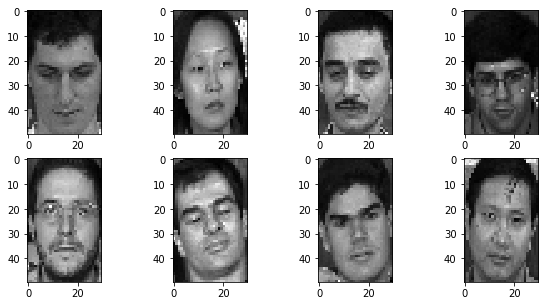

In [8]:
# starter code for the students
train_dataset, test_dataset, train_labels, test_labels = fetch_and_read_data()

# code to plot some of the images
fig, axes = plt.subplots(2,4,figsize=(10,5))
axes = axes.flatten()
[axes[i].imshow(train_dataset[i], cmap='gray') for i in range(len(axes))]
plt.show()